# Importing

In [398]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold


# Reading data


In [399]:
data_raw = pd.read_csv('tested_molecules.csv')

# Calculating descriptors

In [400]:
def calc_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles) #string to molecule object
    descriptors = {}
    for name, func in Descriptors.descList:
        descriptors[name] = func(mol)
    return descriptors


descriptor_data =data_raw['SMILES'].apply(calc_descriptors) #blabla kijk ff chatgpt, willen we losse df of dit als rij? vgm asl rij, check ff Evi's versie 

[17:05:51] DEPRECATION WARNING: please use MorganGenerator
[17:05:51] DEPRECATION WARNING: please use MorganGenerator
[17:05:51] DEPRECATION WARNING: please use MorganGenerator
[17:05:51] DEPRECATION WARNING: please use MorganGenerator
[17:05:51] DEPRECATION WARNING: please use MorganGenerator
[17:05:51] DEPRECATION WARNING: please use MorganGenerator
[17:05:51] DEPRECATION WARNING: please use MorganGenerator
[17:05:51] DEPRECATION WARNING: please use MorganGenerator
[17:05:51] DEPRECATION WARNING: please use MorganGenerator
[17:05:51] DEPRECATION WARNING: please use MorganGenerator
[17:05:51] DEPRECATION WARNING: please use MorganGenerator
[17:05:51] DEPRECATION WARNING: please use MorganGenerator
[17:05:51] DEPRECATION WARNING: please use MorganGenerator
[17:05:51] DEPRECATION WARNING: please use MorganGenerator
[17:05:51] DEPRECATION WARNING: please use MorganGenerator
[17:05:51] DEPRECATION WARNING: please use MorganGenerator
[17:05:51] DEPRECATION WARNING: please use MorganGenerat

# Adding data to a dataframe

In [401]:
df_molecules = pd.DataFrame(data_raw['SMILES']) #create a new dataframe for the smiles and descriptors

df_descriptors=pd.DataFrame(descriptor_data.tolist()) #making a dataframe for the descriptor data

df_molecules = pd.concat([df_molecules, df_descriptors], axis=1)

df_molecules.head()


,SMILES,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,C=C(C)c1nc(N)nc(N)n1,5.313889,5.313889,0.120833,0.120833,0.592228,9.545455,151.173,142.101,151.085795,...,0,0,0,0,0,0,0,0,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,11.238954,11.238954,0.225308,-0.366756,0.785414,10.470588,250.681,239.593,250.039672,...,0,0,0,0,0,0,0,0,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,11.090706,11.090706,0.049610,-0.049610,0.581062,9.066667,210.277,192.133,210.136828,...,0,0,0,0,0,0,0,0,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,11.892238,11.892238,0.076632,-0.457824,0.441090,10.411765,232.239,220.143,232.084792,...,0,0,0,0,0,0,0,0,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,11.693580,11.693580,0.012315,-0.498260,0.720343,9.933333,226.663,215.575,226.050905,...,0,0,0,0,0,0,0,0,0,0


# Splitting and scaling the descriptors

In [402]:
# For the filters to work it is better if all data is standardized so we will make a copy so we don't lose the actual values

df_molecules_copy = df_molecules.copy()
df_descriptors=df_molecules_copy.drop(columns=['SMILES'])
# We do not want to standardize binary columns, so we need to seperate these from the other columns
binary_columns = []#list of names of the binary columns
non_binary_columns=[]

for column in df_descriptors.columns:
    if df_molecules_copy[column].nunique() == 2 and df_descriptors[column].min() == 0 and df_descriptors[column].max() == 1:
        binary_columns.append(column)
    elif column not in binary_columns:
        non_binary_columns.append(column)

print(binary_columns)
print(non_binary_columns)

#oke sklearn wilde t opeens niet doen in deze environment, maar rdkit niet in de ander, vanaf hier kan ik mijn code dus neit meer testen, ik hoop dat ie t doet bij jullie, anders lmk :))
binary_descriptors=df_descriptors[binary_columns]
non_binary_descriptors=df_descriptors[non_binary_columns]

scaler = StandardScaler()
standardized_non_binary_cols=pd.DataFrame(scaler.fit_transform(non_binary_descriptors),
                                                   columns=non_binary_columns)

#put the binary columns together with the standardized non binary columns
df_standardized_descriptors = pd.concat([standardized_non_binary_cols, binary_descriptors], axis=1) #put the binary columns together with the standardized non binary columns




['fr_Al_COO', 'fr_C_S', 'fr_Imine', 'fr_barbitur', 'fr_dihydropyridine', 'fr_guanido', 'fr_lactam', 'fr_lactone', 'fr_nitro', 'fr_nitro_arom', 'fr_oxazole', 'fr_priamide']
['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_

# Applying filters

In [403]:
#Low variance filter:
var_filter = VarianceThreshold(threshold=0.001)
X_var_filtered = var_filter.fit_transform(df_standardized_descriptors)
df_filtered_once_descriptors = pd.DataFrame(X_var_filtered, columns=df_standardized_descriptors.columns[var_filter.get_support()])


# High-correlation filter
# Calculate the correlation matrix
corr_matrix = df_filtered_once_descriptors.corr().abs()

# Flatten the correlation matrix to get unique pairs of columns
corr_values = corr_matrix.unstack()

# Drop the diagonal values (correlation of a feature with itself)
corr_values = corr_values.drop(labels=corr_matrix.columns)

# Get pairs of columns with correlation greater than the threshold (e.g., 0.9)
highly_correlated_pairs = corr_values[corr_values > 0.95].index.tolist()

# Extract unique columns from the pairs
to_drop = set()
for pair in highly_correlated_pairs:
    to_drop.add(pair[0])  # Add the first column of the pair
    to_drop.add(pair[1])  # Add the second column of the pair (both need to be dropped since correlation is the same both ways)

# Drop highly correlated columns from the filtered descriptors DataFrame
df_filtered_twice_descriptors = df_filtered_once_descriptors.drop(columns=to_drop)




# Getting filtered columns from original data

In [404]:
#OKay nu hebben we een df die gefilterd is, maar met standardized waarden, we willen t origineel hebben dus we moeten die kolommen eruit halen:
relevant_columns=['SMILES']
filtered_descriptors=list(df_filtered_twice_descriptors.columns)

for column in filtered_descriptors:
    relevant_columns.append(column)


df_filtered_molecules=df_molecules[relevant_columns]
df_filtered_molecules # dit is de output met smiles en dan de descriptors die relevant zijn


#test mocht sklearn het ooit doen:
#descriptors_left=list(df_filtered_molecules.columns)
#print(descriptors_left)

,SMILES,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_urea,fr_Al_COO,fr_C_S,fr_Imine,fr_barbitur,fr_dihydropyridine,fr_guanido,fr_lactone,fr_oxazole,fr_priamide
0,C=C(C)c1nc(N)nc(N)n1,5.313889,5.313889,0.120833,0.120833,0.592228,9.545455,151.173,142.101,151.085795,...,0,0,0,0,0,0,0,0,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,11.238954,11.238954,0.225308,-0.366756,0.785414,10.470588,250.681,239.593,250.039672,...,0,0,0,0,0,0,0,0,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,11.090706,11.090706,0.049610,-0.049610,0.581062,9.066667,210.277,192.133,210.136828,...,0,0,0,0,0,0,0,0,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,11.892238,11.892238,0.076632,-0.457824,0.441090,10.411765,232.239,220.143,232.084792,...,0,0,0,0,0,0,0,0,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,11.693580,11.693580,0.012315,-0.498260,0.720343,9.933333,226.663,215.575,226.050905,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,O=C1c2ccccc2[C@H](Nc2ccc3c(c2)OCCO3)N1Cc1ccco1,12.955843,12.955843,0.016627,-0.290408,0.764433,17.703704,362.385,344.241,362.126657,...,0,0,0,0,0,0,0,0,0,0
1112,O=S(=O)(Nc1cccc(-c2cn3ccsc3[nH+]2)c1)c1ccc(F)cc1,12.983770,12.983770,0.009487,-3.772852,0.594812,11.720000,374.442,361.338,374.042773,...,0,0,0,0,0,0,0,0,0,0
1113,Oc1c(C[NH+]2CCN(c3ccccn3)CC2)cc(Cl)c2cccnc12,10.579691,10.579691,0.249681,0.249681,0.753119,15.640000,355.849,335.689,355.132015,...,0,0,0,0,0,0,0,0,0,0
1114,c1ccc(-c2csc(N3CCN(c4ccccn4)CC3)n2)cc1,4.812249,4.812249,0.983396,0.983396,0.738254,14.956522,322.437,304.293,322.125218,...,0,0,0,0,0,0,0,0,0,0


# Applying PCA

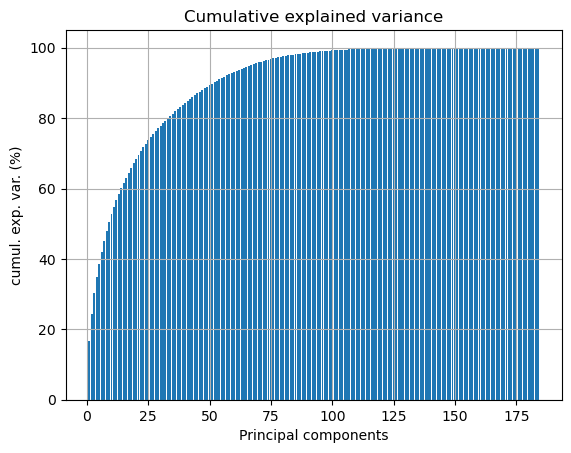

Number of principle components needed to cover 65% of the data: 18


In [405]:
X = df_filtered_molecules.drop(columns=['SMILES'])  # Looking at all the descriptors
#y_PKM = data_raw['PKM2_inhibition']    # Comparing the PKM2 inhibition to the descriptors
#y_ERK = data_raw['ERK2_inhibition']     # Comparing the ERK2 inhibition to the descriptors

# Standardizing the features

X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)
variance = pca.explained_variance_ratio_

# Summing the variance and transforming to a percentage
cumulative_variance = np.cumsum(variance)*100

# Plotting the cumulative explained variance in a barplot
plt.bar(x=list(range(1,len(cumulative_variance)+1)), height=cumulative_variance)

# Setting the title and labels
plt.title("Cumulative explained variance")
plt.xlabel("Principal components")
plt.ylabel("cumul. exp. var. (%)")
plt.grid(True)
plt.show()

# Deciding how many principle components are needed to cover 65% of the data 
n_principle_components = 0
variance = cumulative_variance[n_principle_components]
while variance <= 65: 
    n_principle_components += 1 
    variance = cumulative_variance[n_principle_components]
n_principle_components += 1  # Count 1 with the number of principle components, since the first index is 0 in stead of 1 
print('Number of principle components needed to cover 65% of the data:', n_principle_components)  


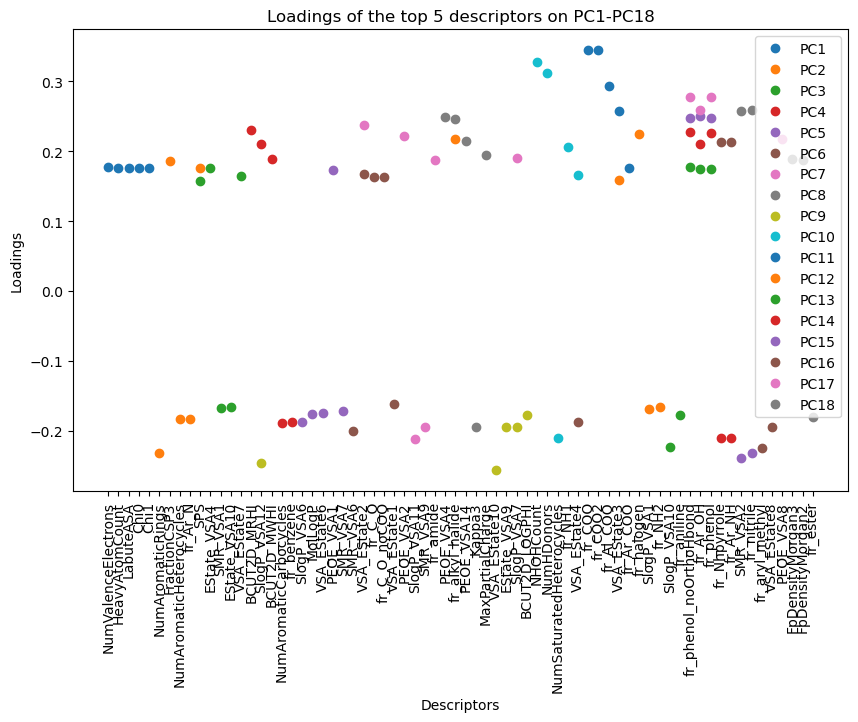

In [406]:
pca18 = PCA(n_components=n_principle_components)
pca18.fit(X_scaled)

fig = plt.figure(figsize=(10, 6))
# Doorloop de componenten
for i in range(n_principle_components):
    loadings_pc = pd.DataFrame(pca18.components_[i], columns=['loading'], index=X.columns)
    loadings_pc['absolute_loadings'] = loadings_pc['loading'].abs()

    # Sort loadings with descriptor with highest loading first 
    loadings_pc_sorted = loadings_pc.sort_values(by='absolute_loadings', ascending=False)
    top_5_descriptors = loadings_pc_sorted.head(5)

    # Plotting the loadings on PC1 and PC2 compared
    plt.plot(top_5_descriptors['loading'], label=f'PC{i+1}', marker="o", linestyle = "None")
    #filtered_loadings = loadings_pc.loc[top_descriptors.keys()]
    #plt.plot(filtered_loadings['loading']) #, label='PC{i}'
    
    
    # Print top 5 descriptors 
    
    #print(f"Component {i+1}: Top 5 descriptors indices and loadings:\n{top_5_descriptors}\n")

# Plotting the loadings on PC1-PC18
plt.title('Loadings of the top 5 descriptors on PC1-PC18')
plt.xlabel('Descriptors')
plt.ylabel('Loadings')
plt.xticks(rotation=90)
# plt.xticks(range(len(top_descriptors.keys())),top_descriptors, rotation=90)
plt.legend()
plt.show()

In [407]:
# Maak een DataFrame van de loadings
loadings = pca18.components_
loading_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=X.columns)

# Sorteer elektroden op absolute loadings voor PC1
sorted_pc1 = loading_df['PC1'].abs().sort_values(ascending=False)
# Sorteer elektroden op absolute loadings voor PC2
sorted_pc2 = loading_df['PC2'].abs().sort_values(ascending=False)

# Selecteer de top elektroden met hoogste absolute loadings voor PC2
top_descriptors_pc2 = sorted_pc2.index[:10]
# Selecteer de top elektroden met hoogste absolute loadings voor PC1
top_descriptors_pc1 = sorted_pc1.index[:10]

PC_list = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18']
top_descriptors = {}
for PC in PC_list:
    sorted_PC = loading_df[PC].abs().sort_values(ascending=False)
    top_descriptors_PC = sorted_PC.index[:5]
    for descriptor in top_descriptors_PC:
        if descriptor in top_descriptors:
            top_descriptors[descriptor] += 1
        else:
            top_descriptors[descriptor] = 1
top_descriptors = dict(sorted(top_descriptors.items(), key=lambda item: item[1], reverse=True))
i=0

# Print the top descriptors for PC1-PC18
print('Top descriptors for PC1-PC18:')
print('Nr.    Count     Descriptor'	)
final_descriptor = []
for descriptor in top_descriptors:
    if top_descriptors[descriptor] > 3:
        i+=1
        print(i, "      ", top_descriptors[descriptor], '     ', descriptor)
        final_descriptor.append(descriptor)


print(final_descriptor)

Top descriptors for PC1-PC18:
Nr.    Count     Descriptor
1        4       fr_phenol_noOrthoHbond
2        4       fr_Ar_OH
3        4       fr_phenol
['fr_phenol_noOrthoHbond', 'fr_Ar_OH', 'fr_phenol']


# Outlier analysis

In [408]:
z_scores = stats.zscore(df_descriptors)

threshold = 0.5
outlier = np.abs(z_scores) > threshold
df_outliers = binary_descriptors[outlier]
df_outliers = df_outliers.dropna(how='all')
df_outliers.head()

,fr_Al_COO,fr_C_S,fr_Imine,fr_barbitur,fr_dihydropyridine,fr_guanido,fr_lactam,fr_lactone,fr_nitro,fr_nitro_arom,fr_oxazole,fr_priamide
17,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
47,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Create a csv file

In [409]:
df_descriptor_molecules = df_filtered_molecules[final_descriptor]
pd.DataFrame.to_csv(df_descriptor_molecules, 'descriptors.csv',index=False) 